# Import libraries

In [181]:
import re
import csv
import json
import gzip
import numpy as np
import pandas as pd 

# Import data

In [223]:
path_to_data_folder = '/Users/abdulnaser/Desktop/Masterarbeit/metadatatransferlearning-main/meta_tl/data/'
path_to_help_data = path_to_data_folder + 'help_data/'

In [224]:
# Open the JSON file
extracted_data = []
with open('/Users/abdulnaser/Desktop/Masterarbeit/Music/threshold_0.45/vertices.json', 'r') as f:
    # Read each line and parse JSON object
    for line in f:
        try:
            # Parse JSON object
            data = json.loads(line)
            # Extract "id" and "data" fields
            extracted_item = {
                "id": data["id"]
            }
            # Flatten the "data" column into separate columns
            extracted_item.update(data["data"])
            # Append to the list
            extracted_data.append(extracted_item)
            
        except json.JSONDecodeError as e:
            print("Error decoding JSON:", e)
            continue

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(extracted_data)
df = df[['id','title','album','artist','srcId','recId']]
df.to_csv('/Users/abdulnaser/Desktop/Masterarbeit/metadatatransferlearning-main/meta_tl/data/help_data/data_cleaned_music.csv')
df.head()


,id,title,album,artist,srcId,recId
0,58c007cf9184900a77a26089,Daniel Balavoine - L'enfant aux yeux d'Italie,De vous à elle en passant par moi,,2,1
1,58c007cf9184900a77a2608a,007,Cantigas de roda (unknown),[unknown],4,2512/Users/abdulnaser/Desktop/Masterarbeit/met...
2,58c007cf9184900a77a2608b,Action PAINTING! - Mustard Gas,There and Back Again Lane,,2,2
3,58c007cf9184900a77a2608c,Your Grace,Comfort,Kathy Troccoli,5,3
4,58c007cf9184900a77a2608d,Well You Needn't,First Down,Ernie Stadler Jazz Quintet,5,4


In [225]:
df['artist'] = df['artist'].replace('', np.nan)
df['artist'] = df['artist'].replace("[unknown]", np.nan)
df['album'] = df['album'].replace('', np.nan)
df['album'] = df['album'].replace("[unknown]", np.nan)
df['title'] = df['title'].replace('', np.nan)
df['title'] = df['title'].replace("[unknown]", np.nan)
df

,id,title,album,artist,srcId,recId
0,58c007cf9184900a77a26089,Daniel Balavoine - L'enfant aux yeux d'Italie,De vous à elle en passant par moi,NaN,2,1
1,58c007cf9184900a77a2608a,007,Cantigas de roda (unknown),NaN,4,2512/Users/abdulnaser/Desktop/Masterarbeit/met...
2,58c007cf9184900a77a2608b,Action PAINTING! - Mustard Gas,There and Back Again Lane,NaN,2,2
3,58c007cf9184900a77a2608c,Your Grace,Comfort,Kathy Troccoli,5,3
4,58c007cf9184900a77a2608d,Well You Needn't,First Down,Ernie Stadler Jazz Quintet,5,4
...,...,...,...,...,...,...
19370,58c007d09184900a77a2ac33,009-Feels Like I'm in Love,The 80's Collection: 1980 (unknown),Kell Marie,4,9997
19371,58c007d09184900a77a2ac34,The Pressure of Pitching Doves - Run on Anything,NaN,Buddy Wakefield,3,9998
19372,58c007d09184900a77a2ac35,0B4-Woodpecker From Mars,The Real Thing (1989),Faith No More,4,9999
19373,58c007d09184900a77a2ac36,Lowell Fulson - Shed No Tears,Reconsider Baby,NaN,2,10000


# Source_1

In [226]:
source_1 = df.loc[df['srcId']=='1']

source_1['title'] = source_1['title'].str.split('(').str[0]
# Strip leading and trailing whitespaces
source_1['title'] = source_1['title'].str.strip()

source_1.head()

,id,title,album,artist,srcId,recId
15,58c007cf9184900a77a26098,Scottish Fantasy: Adagio cantabile,"The Classical Album, Volume 1",Max Bruch,1,5371
19,58c007cf9184900a77a2609c,AmnerisIntro:EveryStoryIsaLoveStory/HeatherHea...,Forbidden Broadway 2001: A Spoof Odyssey (2001...,Gerard Alessandrini,1,14
21,58c007cf9184900a77a2609e,Outro,Working Title,FeSo,1,2151
22,58c007cf9184900a77a2609f,10cm,10cm,Anemone,1,15
27,58c007cf9184900a77a260a4,Placebo Persuasion,"More Specific, Less Pacific",Caesura,1,17


# Soucre_2

In [227]:
source_2 = df.loc[df['srcId']=='2']

source_2['artist'] = source_2['title'].str.split('-').str[0].str.strip()

source_2['title'] = source_2['title'].str.split('-').str[1]
# Strip leading and trailing whitespaces
source_2['title'] = source_2['title'].str.strip()

source_2.head()

,id,title,album,artist,srcId,recId
0,58c007cf9184900a77a26089,L'enfant aux yeux d'Italie,De vous à elle en passant par moi,Daniel Balavoine,2,1
2,58c007cf9184900a77a2608b,Mustard Gas,There and Back Again Lane,Action PAINTING!,2,2
6,58c007cf9184900a77a2608f,Sttreet Hype,Groove City,Bruce Maginnis,2,2136
7,58c007cf9184900a77a26090,Ballade à donner,Luce Dufault,Luce Dufault,2,6
16,58c007cf9184900a77a26099,Wo ist der Mann?,Die frühen Aufnahmen,Marlene Dietrich,2,11


# Source_3

In [228]:
source_3 = df.loc[df['srcId']=='3']
source_3['title'] = source_3['title'].str.split('-').str[0]
source_3.head()


,id,title,album,artist,srcId,recId
5,58c007cf9184900a77a2608e,Try (acoustic),NaN,Neil Young,3,5
20,58c007cf9184900a77a2609d,Cállate,NaN,Wisin & Yandel,3,3118
24,58c007cf9184900a77a260a1,Fish Tail Blues,NaN,Jelly Roll Morton,3,5893
38,58c007cf9184900a77a260af,Mu sõber tuul,NaN,Laine,3,519
43,58c007cf9184900a77a260b4,Fried Bananas,NaN,Dexter Gordon,3,25


# Source 4

In [229]:
source_4 = df.loc[df['srcId']=='4']
source_4['title'] = source_4['title'].str.split('-').str[1]
source_4.head()

,id,title,album,artist,srcId,recId
1,58c007cf9184900a77a2608a,NaN,Cantigas de roda (unknown),NaN,4,2512/Users/abdulnaser/Desktop/Masterarbeit/met...
12,58c007cf9184900a77a26095,Particle/Wave,Evolver (2002),Lunchbox,4,9
13,58c007cf9184900a77a26096,Deja Vu,Nice (2000),Blanket,4,10
14,58c007cf9184900a77a26097,Feeling Good,Andy Bey and the Bey Sisters (2000),Andy Bey and the Bey Sisters,4,4209
17,58c007cf9184900a77a2609a,1,(2010),NaN,4,12


# Source 5

In [230]:
source_5 = df.loc[df['srcId']=='5']
source_5.head()

,id,title,album,artist,srcId,recId
3,58c007cf9184900a77a2608c,Your Grace,Comfort,Kathy Troccoli,5,3
4,58c007cf9184900a77a2608d,Well You Needn't,First Down,Ernie Stadler Jazz Quintet,5,4
8,58c007cf9184900a77a26091,Just Like Tom Thumb's Blues (live),"Blues Women Anthology, Volume 7",Wendy Saddington,5,7
9,58c007cf9184900a77a26092,Στα καμένα,"Συλλογή Δίφωνο, 22: Μουσικοί βιότοποι",Λαυρέντης Μαχαιρίίτσας,5,6842
10,58c007cf9184900a77a26093,NaN,Alternative 4,Anathema,5,5568


# Load dataset

In [231]:
""" Module with functionalities for reading data from a
    file and return a dictionary with record identifieres as
    keys and a list of attribute values
"""

def load_data_set(df):
    """Load the data set and store in memory as a
       dictionary with record identifieres as keys.

       Parameter Description:
       file_name: Name of the data file to be read (CSV or CSV.GZ file)
       rec_id_col: Record identifier column of the data file
       header_line: Availability of the header line (True or False)
    """
    rec_num = 0
    rec_dict = {}

    for index, row in df.iterrows():
        row_dict = {}
        for column_name in df.columns:
            row_dict[column_name] = row[column_name]
        rec_dict[row['id']] = row_dict



    if len(rec_dict) < rec_num:
        print(' *** Warning , data set contains %d duplicates ***' % (rec_num - len(rec_dict)))
        print(' %d unique records ' % (len(rec_dict)))



    # return the generated dictionary of records
    return rec_dict

rec_dict_source_1 = load_data_set(source_1)
rec_dict_source_2 = load_data_set(source_2)
rec_dict_source_3 = load_data_set(source_3)
rec_dict_source_4 = load_data_set(source_4)
rec_dict_source_5 = load_data_set(source_5)

list_of_rec_dicts = []
list_of_rec_dicts.append(rec_dict_source_1)
list_of_rec_dicts.append(rec_dict_source_2)
list_of_rec_dicts.append(rec_dict_source_3)
list_of_rec_dicts.append(rec_dict_source_4)
list_of_rec_dicts.append(rec_dict_source_5)


# Blocking

In [232]:
"""
Mdoule with functionalities for blocking on a
dictionary of records, where a blocking function
must return a dictionary with block idetifiera as
keys and values being sets or lists of record
identifiers in that block.

"""

def blocking(rec_dict, blk_attr_list):
    """ Build the blocking index data structure
        (dictionary) to store blocking key values (BKY)
        as keys and the corresponding list of record
        identifieres.

        A blocking is implemented that simply
        concatenates attribute values.

        Parameter Description:
        rec_dict: Dictionary that holds the record
        identifieres as keys and corresponding list of
        record values

        blk_attr_list: List of blocking key attributes to use.

        This method returns a dictionary with blocking
        key values as its keys and list of record
        identifiers as its values (one list for each block).

        Example:
        If the blocking is based on 'postcode' then:
        block_dict = {'2000': [rec1_id, rec2_id, rec3_id, .....],
                      '2600': [rec4_id, rec5_id,..........]
                      .....
        }

        while if the blocking is based on 'postcode' and 'gender' then:
        block_dict = {'2000f': [rec1_id, rec3_id, ......],
                      '2000m': [rec2_id, ......]
                      '2600m': [rec4_id,.......]
                      ...
        }

    """

    # The dictionary with the blocks to be generated and returned
    block_dict = {}

    #print('Run blocking:')
    #print('List of blocking key attributes: ' + str(blk_attr_list))
    #print('Number of records to be blcoked: ') + str(len(rec_dict))
    #print('')

    for (rec_id , rec_values) in rec_dict.items():

        # Initialise the blocking key values for this record
        rec_bkv = ''

        # Process selected blocking attributes
        for attr in blk_attr_list:

            attr_val = rec_values[attr]
            attr_val = str(attr_val)
            rec_bkv += attr_val[:1]

        # Insert the blocking key value and the record into
        # the blocking dictionary
        if (rec_bkv in block_dict): # Block key value in block index
            # Only need to add the record
            rec_id_list = block_dict[rec_bkv]
            rec_id_list.append(rec_id)

        else: # Block key value not in block index
            # Create a new block and add the record
            # identifier
            rec_id_list = [rec_id]
        block_dict[rec_bkv] = rec_id_list # store the new block

    return block_dict



def printBlockStatistics(BlockA_dict):
    """
     Calculate and print some basics statistics about
     the generated blocks
    """

    #print('Statistics of the generated blocks for {} : '.format(dataset_name))


    numA_blocks = len(BlockA_dict)


    block_sizeA_list = []
    for rec_id_list in BlockA_dict.values(): # Loop over all blocks
        block_sizeA_list.append(len(rec_id_list))

    print('Dataset A number of blocks generated: %d' % (numA_blocks))
    print(' Minimum block size: %d' % (min(block_sizeA_list)))
    print(' Average block size: %.2f' % \
          (float(sum(block_sizeA_list)) / len(block_sizeA_list)))
    print(' maximum block size: %d' % (max(block_sizeA_list)))
    print('')

    
blocking_attr_list = ['title','album','artist']

blocking_dict_source_1 = blocking(rec_dict_source_1,blocking_attr_list)
blocking_dict_source_2 = blocking(rec_dict_source_2,blocking_attr_list)
blocking_dict_source_3 = blocking(rec_dict_source_3,blocking_attr_list)
blocking_dict_source_4 = blocking(rec_dict_source_4,blocking_attr_list)
blocking_dict_source_5 = blocking(rec_dict_source_5,blocking_attr_list)

list_of_blocking_dicts = []
list_of_blocking_dicts.append(blocking_dict_source_1)
list_of_blocking_dicts.append(blocking_dict_source_2)
list_of_blocking_dicts.append(blocking_dict_source_3)
list_of_blocking_dicts.append(blocking_dict_source_4)
list_of_blocking_dicts.append(blocking_dict_source_5)



# Comparison

In [233]:

def dice_comp(val1, val2):
    """Calculate the Dice coefficient similarity between the two given attribute
     values by extracting sets of sub-strings (q-grams) of length q.

     Returns a value between 0.0 and 1.0.
  """
    Q = 3  # Value length of q-grams for Jaccard and Dice comparison function

    is_efficient = False
    is_padding = True
    # If at least one of the values is empty return 0
    #
    if (len(val1) == 0) or (len(val2) == 0):
        return 0.0

    # If both attribute values exactly match return 1
    #
    elif val1 == val2:
        return 1.0
    if not is_efficient:
        if is_padding:
            pad_val_1 = "#" * (Q - 1) + val1 + "#" * (Q - 1)
            pad_val_2 = "#" * (Q - 1) + val2 + "#" * (Q - 1)
        else:
            pad_val_1 = val1
            pad_val_2 = val2
        q_gram_list1 = [pad_val_1[i:i + Q] for i in range(len(pad_val_1) - (Q - 1))]
        q_gram_list2 = [pad_val_2[i:i + Q] for i in range(len(pad_val_2) - (Q - 1))]
        q_gram_set1 = set(q_gram_list1)
        q_gram_set2 = set(q_gram_list2)
    else:
        q_gram_set1 = val1
        q_gram_set2 = val2
    if len(q_gram_set1) == 0 or len(q_gram_set2) == 0:
        return 0
    i = len(q_gram_set1.intersection(q_gram_set2))
    dice_sim = 2.0 * float(i) / float(len(q_gram_set1) + len(q_gram_set2))

    # ************ End of your Dice code ****************************************

    assert 0.0 <= dice_sim <= 1.0

    return dice_sim




def jaccard_comp(val1, val2):
    """Calculate the Jaccard similarity between the two given attribute values
     by extracting sets of sub-strings (q-grams) of length q.

     Returns a value between 0.0 and 1.0.
  """
    # If at least one of the values is empty return 0
    #
    if (len(val1) == 0) or (len(val2) == 0):
        return 0.0

    # If both attribute values exactly match return 1
    #
    elif (val1 == val2):
        return 1.0

    # ********* Implement Jaccard similarity function here *********

    jacc_sim = 0.0  # Replace with your code
    if not is_efficient:
        if is_padding:
            pad_val_1 = "#" * (Q - 1) + val1 + "#" * (Q - 1)
            pad_val_2 = "#" * (Q - 1) + val2 + "#" * (Q - 1)
        else:
            pad_val_1 = val1
            pad_val_2 = val2
        q_gram_list1 = [pad_val_1[i:i + Q] for i in range(len(pad_val_1) - (Q - 1))]
        q_gram_list2 = [pad_val_2[i:i + Q] for i in range(len(pad_val_2) - (Q - 1))]

        q_gram_set1 = set(q_gram_list1)
        q_gram_set2 = set(q_gram_list2)
    else:
        q_gram_set1 = val1
        q_gram_set2 = val2

    i = len(q_gram_set1.intersection(q_gram_set2))
    u = len(q_gram_set1.union(q_gram_set2))
    assert u > 0, u

    jacc_sim = float(i) / u

    # ************ End of your Jaccard code *************************************

    assert jacc_sim >= 0.0 and jacc_sim <= 1.0

    return jacc_sim


# ================================================================
# Function to compare a block

def compareBlocks(blockA_dict, blockB_dict, recA_dict, recB_dict, attr_comp_list,file_name):
    """Build a similarity dictionary with pair of records from the two given
     block dictionaries. Candidate pairs are generated by pairing each record
     in a given block from data set A with all the records in the same block
     from dataset B.

     For each candidate pair a similarity vector is computed by comparing
     attribute values with the specified comparison method.

     Parameter Description:
       blockA_dict    : Dictionary of blocks from dataset A
       blockB_dict    : Dictionary of blocks from dataset B
       recA_dict      : Dictionary of records from dataset A
       recB_dict      : Dictionary of records from dataset B
       attr_comp_list : List of comparison methods for comparing individual
                        attribute values. This needs to be a list of tuples
                        where each tuple contains: (comparison function,
                        attribute number in record A, attribute number in
                        record B).

     This method returns a similarity vector with one similarity value per
     compared record pair.

     Example: sim_vec_dict = {(recA1,recB1) = [1.0,0.0,0.5, ...],
                              (recA1,recB5) = [0.9,0.4,1.0, ...],
                               ...
                             }
    """

    print('Compare %d blocks from dataset A with %d blocks from dataset B' % \
          (len(blockA_dict), len(blockB_dict)))

    print("The sources that we are comparing are ")
    print(file_name)
    sim_vec_dict = {} # A dictionary where keys are record pairs and values
    # lists of similatiry values


    # Iterate through each block in dictionary from dataset A
    for(block_bkv, rec_idA_list) in blockA_dict.items():
        # Check if the same blocking key occurs also for dataset B
        if(block_bkv in blockB_dict):
            # If so get the record identifier list from dataset B
            rec_idB_list = blockB_dict[block_bkv]

            # Compare each record in rec_id_listA with each record from rec_id_listB
            for rec_idA in rec_idA_list:
                recA = recA_dict[rec_idA]

                for rec_idB in rec_idB_list:
                    recB = recB_dict[rec_idB]

                    # generate the similiarty vector
                    sim_vec = compareRecord(recA, recB, attr_comp_list)

                    # Add the similarity vector of the compared pair to the similarity
                    # vector dictionary
                    #
                    sim_vec_dict[(rec_idA, rec_idB)] = sim_vec
    print('  Compared %d record pairs' % (len(sim_vec_dict)))
    print('')

    # save the sim vects as dataframe
    save_similiarty_vectors_into_dataframe(sim_vec_dict,file_name)

    return sim_vec_dict



def compareRecord(recA, recB, attr_comp_list):
    """Generate the similarity vector for the given record pair by comparing
     attribute values according to the comparison function and attribute
     numbers in the given attribute comparison list.

     Parameter Description:
       recA           : List of first record values for comparison
       recB           : List of second record values for comparison
       attr_comp_list : List of comparison methods for comparing attributes,
                        this needs to be a list of tuples where each tuple
                        contains: (comparison function, attribute number in
                        record A, attribute number in record B).

     This method returns a similarity vector with one value for each compared
     attribute.
  """
    sim_vec = []
    # Calculate a similarity for each attribute to be comapred
    #
    for (comp_funct, attr_numA, attr_numB) in attr_comp_list:
        #print("The attributes to compare are :")
        #print(attr_numA)
        #print(attr_numB)
        a_value = recA[attr_numA]
        b_value = recB[attr_numB]

        if a_value == '/':
            valA = '/'

        elif a_value == '' or pd.isnull(a_value):
            valA = '/' # Handle empty string or NaN values

        else:
            valA = recA[attr_numA]


        if b_value == '/':
            valB = '/'

        elif b_value == '' or pd.isnull(b_value):
            valB = '/' # Hanlde empty string or NaN values

        else:
            valB = recB[attr_numB]

        if valA == '/' or valB == '/':
            sim = '/'

        else:
            sim = comp_funct(valA, valB)

        sim_vec.append(sim)

    return sim_vec


def save_similiarty_vectors_into_dataframe(sim_vectors,file_name):

    # Extract keys and values from the dictionray
    keys = list(sim_vectors.keys())
    values = list(sim_vectors.values())


    # create lists to store data for DataFrame columns
    record_1 = [key[0] for key in keys]
    record_2 = [key[1] for key in keys ]

    # Create a dictionary for DataFrame creation
    data = {
        "record_compared_1": record_1,
        "record_compared_2": record_2,
        "title_dice3": [val[0] for val in values],
        "album_dice3": [val[1] for val in values],
        "artist_dice3": [val[2] for val in values]
    }

    # create DataFrame
    df = pd.DataFrame(data)

    # Specify the file path where you want to save the CSV file
    file_path = "/Users/abdulnaser/Desktop/Masterarbeit/metadatatransferlearning-main/meta_tl/data/sim_dataframes/music/" + file_name + ".csv"

    # Save the DataFrame to the specified path as a CSV file
    df.to_csv(file_path, index=False)
    
    
approx_comp_funct_list = [ (dice_comp, 'title', 'title'),
                           (dice_comp, 'album', 'album'),
                           (dice_comp, 'artist', 'artist'),
                         ]
processed_pairs = []
for rec_dict_num1 in range(len(list_of_rec_dicts)):
    for rec_dict_num2 in range(len(list_of_rec_dicts)):
            source_1 = next(iter(list_of_rec_dicts[rec_dict_num1].values())).get('srcId')
            source_2 = next(iter(list_of_rec_dicts[rec_dict_num2].values())).get('srcId')
            if source_1 != source_2:
                source1_source2 = source_1 + "_" + source_2
                source2_source1 = source_2 + "_" + source_1
                if (source1_source2 in processed_pairs) or (source2_source1 in processed_pairs):
                    pass
                else:
                    sim_vec_dict = compareBlocks(list_of_blocking_dicts[rec_dict_num1], list_of_blocking_dicts[rec_dict_num2],
                                                 list_of_rec_dicts[rec_dict_num1], list_of_rec_dicts[rec_dict_num2],
                                                 approx_comp_funct_list,source1_source2)
                    processed_pairs.append(source1_source2)
                    processed_pairs.append(source2_source1)


                           

Compare 3046 blocks from dataset A with 3048 blocks from dataset B
The sources that we are comparing are 
1_2
  Compared 3967 record pairs

Compare 3046 blocks from dataset A with 1090 blocks from dataset B
The sources that we are comparing are 
1_3
  Compared 484 record pairs

Compare 3046 blocks from dataset A with 3006 blocks from dataset B
The sources that we are comparing are 
1_4
  Compared 3133 record pairs

Compare 3046 blocks from dataset A with 2988 blocks from dataset B
The sources that we are comparing are 
1_5
  Compared 4076 record pairs

Compare 3048 blocks from dataset A with 1090 blocks from dataset B
The sources that we are comparing are 
2_3
  Compared 482 record pairs

Compare 3048 blocks from dataset A with 3006 blocks from dataset B
The sources that we are comparing are 
2_4
  Compared 3561 record pairs

Compare 3048 blocks from dataset A with 2988 blocks from dataset B
The sources that we are comparing are 
2_5
  Compared 3833 record pairs

Compare 1090 blocks fr

# Gorund truth generation

In [234]:
import os 
def ground_truth_data_extractor():
    
    path_to_data_folder = '/Users/abdulnaser/Desktop/Masterarbeit/metadatatransferlearning-main/meta_tl/data/'
    path_to_help_data = path_to_data_folder + 'help_data/'
    path_to_gt_folder = path_to_data_folder + 'ground_truth_data/music/'
    path_to_sim_vectors_folder = path_to_data_folder + 'sim_dataframes/music/'

    
    data = pd.read_csv(path_to_help_data + 'data_cleaned_music.csv')

    for filename in os.listdir(path_to_sim_vectors_folder):
        print(filename)
        if filename.endswith(".csv"):

            sim_vec_file_path = os.path.join(path_to_sim_vectors_folder, filename)

            # Read the sim_vec_csv file into a dataframe
            sim_vec_df = pd.read_csv(sim_vec_file_path)

            # Split the string by underscore
            parts = filename.split("_")

            # Extract the two parts
            first_source = int(parts[0])
            second_source = int(parts[1].replace('.csv',''))


            first_source_df = data.loc[data['srcId'] == first_source]
            second_source_df = data.loc[data['srcId'] == second_source]

            # Merge DataFrames on the 'ID' column
            sim_vec_gt_df = pd.merge(first_source_df, second_source_df, on='recId', how='inner')  # 'inner' means use the intersection of keys from both frames

            sim_vec_gt_df = sim_vec_gt_df[['id_x','id_y','recId','recId']]

            # Rename the column names of the ground truth data to match the other columns in the other dataframe to be the merge succefull
            sim_vec_gt_df.rename(columns = {'id_x':'record_compared_1', 'id_y':'record_compared_2'},inplace=True)
            sim_vec_gt_df.rename(columns={'id_x': 'record_compared_1', 'id_y': 'record_compared_2'}, inplace=True)

            sim_vec_gt_df['is_match'] = 1

            # Merge the dataframes on 'record_compared_1' and 'record_compared_2'
            merged_df = pd.merge(sim_vec_df, sim_vec_gt_df, on = ['record_compared_1', 'record_compared_2'], how= 'left')

            # Fill NaN values in 'is_match' column with zeros
            merged_df['is_match'].fillna(0, inplace=True)

            sim_vec_gt_df.to_csv(path_to_gt_folder + filename)
            merged_df.to_csv(os.path.join(path_to_sim_vectors_folder, filename))


ground_truth_data_extractor()

4_5.csv
2_3.csv
.DS_Store
2_5.csv
2_4.csv
1_2.csv
1_3.csv
3_5.csv
3_4.csv
1_4.csv
1_5.csv


# Evaluation

# Import libraries

In [235]:
import os 
import math
import time
import pickle
import warnings
import numpy as np
import pandas as pd
import xgboost as xgb
import networkx as nx
from sklearn.svm import SVC
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.kernel_approximation import RBFSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import pairwise_kernels
from networkx.algorithms.community import girvan_newman
from sklearn.metrics.pairwise import euclidean_distances
from networkx.algorithms.community import asyn_lpa_communities
from sklearn.model_selection import cross_val_score,cross_val_predict,cross_validate,StratifiedKFold

warnings.filterwarnings("ignore")

# Set the pathes to the data folders

In [236]:
path_to_working_dir = '/Users/abdulnaser/Desktop/Masterarbeit/metadatatransferlearning-main/meta_tl/'
path_to_data_folder = path_to_working_dir + 'data/'
path_to_sim_vector_folder =  path_to_data_folder + 'sim_dataframes/music/'
models_directory = path_to_working_dir + 'models/'
path_to_results_folder = path_to_data_folder + 'results/'
path_to_feature_vectors_folder = path_to_data_folder + 'feature_vectors/'
active_learning_path = path_to_data_folder + 'active_learning/'
path_to_models_folders = path_to_data_folder + 'models/'

# Utils

In [339]:
# Calculate the Euclidean distance between rows
def calculate_distances(row,df, columns_to_consider):        
    distances = euclidean_distances([row[columns_to_consider]],df[columns_to_consider])
    return distances.flatten()
   

# Extract the closest 7 rows and calculate the ratio of 'is_match' values
def calcualte_ratio(row, df,columns_to_consider):
    #print("The following row has the value of 'is_match' {}".format(row['is_match']))
    distances = calculate_distances(row,df,columns_to_consider)
    closest_indices = np.argsort(distances)[1:6] # Exclude the row itself
    closest_rows = df.iloc[closest_indices]
    # Count the occurrences of the same 'is_match' label
    match_count = (closest_rows['is_match'] == row['is_match']).sum()
    
    # Calculate the ratio
    ratio = match_count / len(closest_rows)
                
    return ratio


def del_file(file_path):
    try:
        os.remove(file_path)
        print(f"File {file} deleted successfully.")
    except Exception as e:
        print(f"Error deleting {file_path}: {e}")
    


def delete_files_from_folder(folder_path,files_to_del='ALL'):  
    if files_to_del == 'ALL':
        # List all files in the folder
        files = os.listdir(folder_path)

        # Iterate through the files and delete them
        for file in files:
            file_path = os.path.join(folder_path, file)
            del_file(file_path)
    else:
        full_file_path = os.path.join(folder_path, files_to_del)
        del_file(full_file_path)

        
def get_similairty_value(distances):
    """
    Calculate normalized inverse Euclidean similarity between two lists.

    Parameters:
    - list1: First list
    - list2: Second list

    Returns:
    - Normalized inverse Euclidean similarity (a float between 0 and 1)
    """
    # Check if all distances are zero (identical lists)
    if all(distance == 0 for distance in distances):
        return 1.0  # Identical lists, return maximum similarity

    # Normalize the distances and calculate the average
    max_distance = max(distances)
    normalized_distances = [1 - (distance / max_distance) for distance in distances]
    similarity_score = sum(normalized_distances) / len(normalized_distances)

    return similarity_score
    
  
def compute_mean_similarity(list1, list2):
    # Check if the lists have the same length
    if len(list1) != len(list2):
        raise ValueError("Both lists must have the same length")

    # Calculate absolute differences
    abs_diff = [abs(a - b) for a, b in zip(list1, list2)]

    # Normalize and calculate the mean of absolute differences
    mean_normalized_diff = 1.0 - (sum(abs_diff) / len(list1))

    return mean_normalized_diff


def compute_weighted_mean_similarity(values_list):
    
    weights = [30, 20, 20]
    
    new_values = [1 - x for x in values_list]
    
    indices_of_3 = [index for index, value in enumerate(new_values) if value == 3]
    
    new_values_filtered = [value for index, value in enumerate(new_values) if index not in indices_of_3]
    weights_filtered = [value for index, value in enumerate(weights) if index not in indices_of_3]
    
    weighted_mean_similarity = np.average(new_values_filtered, weights=weights_filtered)
    
    return weighted_mean_similarity


def prepare_dataframe_to_similarity_comparison(file_path):
    
    # Set a threshold for the percentage of NaN values
    threshold_percentage = 70
    
    # Columns to extracte from feature extraction 
    to_consider_columns = ['title_dice3','album_dice3','artist_dice3']
    
    df = pd.read_csv(file_path)
    df = df[to_consider_columns]
    # convert "/" into Nan
    df = df.apply(pd.to_numeric, errors= 'coerce')
    # Filter columns where the percentage of NaN values is over the threshold
    filtered_columns = df.columns[df.isna().mean() < threshold_percentage / 100]
    df = df[filtered_columns]
    
    return df
    
        
def prepare_dataframe(df):
    #df.drop(columns=['record_compared_1','record_compared_2','Modell_no_Liste_TruncateBegin20'], axis=1, inplace=True)
    
    df = df[['title_dice3','album_dice3','artist_dice3','is_match']]

    # Replace "/" with 9999 in 'is_match' column
    df.replace('/', 2, inplace=True)
    df.replace('/', np.nan, inplace=True)

    # Convert all columns to numerical data types 
    df = df.apply(pd.to_numeric, errors='coerce')
    
      
    if df.shape[0] > 100:
        df = df.sample(n=100, random_state=42) 
    
    return df


def prepare_dataframe_pred(df):
    #df.drop(columns=['record_compared_1','record_compared_2','Modell_no_Liste_TruncateBegin20'], axis=1, inplace=True)
    
    df = df[['title_dice3','album_dice3','artist_dice3','is_match']]

    # Replace "/" with 9999 in 'is_match' column
    df.replace('/', 2, inplace=True)
    df.replace('/', np.nan, inplace=True)

    # Convert all columns to numerical data types 
    df = df.apply(pd.to_numeric, errors='coerce')
    
    return df


def to_sort_files(files):
    sorted_files = []
    sorted_files.append(files[0])
    for file in sorted_files:
        tmp = similarity_df_first_community_filtered_combined_merged.loc[similarity_df_first_community_filtered_combined_merged['first_file']==file]
        tmp = tmp.loc[tmp['second_file'].isin(files)]
        tmp_sorted = tmp.sort_values(by='avg_sim_val',ascending=False)
        tmp_sorted_files = tmp.sort_values(by='avg_sim_val',ascending=False)['second_file']
        for tmp_sorted_files in tmp_sorted_files:
            if tmp_sorted_files not in sorted_files:
                result = tmp_sorted_files
                sorted_files.append(result)
                break
    
    for file in files:
        if file not in sorted_files:
            sorted_files.append(file)
            
    return sorted_files 
        

def prepare_dataframe_new(df):
    #df.drop(columns=['record_compared_1','record_compared_2','Modell_no_Liste_TruncateBegin20'], axis=1, inplace=True)
    
    df = df[['MPN_Liste_TruncateBegin20','EAN_Liste_TruncateBegin20','Produktname_dic3',
             'Modell_Liste_3g','Digital_zoom_NumMaxProz30','optischer_zoom_NumMaxProz30', 'Breite_NumMaxProz30', 
             'Höhe_NumMaxProz30', 'Gewicht_NumMaxProz30', 'Sensortyp_Jaccard3', 'pred']]

    # Replace "/" with 9999 in 'is_match' column
    df.replace('/', 2, inplace=True)
    df.replace('/', np.nan, inplace=True)

    # Convert all columns to numerical data types 
    df = df.apply(pd.to_numeric, errors='coerce')
    
    return df




def del_files(folder_path):
    files = os.listdir(folder_path)

    # Iterate through the files and remove them
    for file in files:
        file_path = os.path.join(folder_path, file)
        try:
            if os.path.isfile(file_path):
                os.remove(file_path)
                print(f"Removed: {file_path}")
            else:
                print(f"Not a file: {file_path}")
        except Exception as e:
            print(f"Error removing {file_path}: {e}")


            
def is_element_in_lists(list_of_lists, element):
    """
    Check if the given element is present in any of the inner lists.

    Parameters:
    - list_of_lists: A list containing inner lists.
    - element: The element to check for.

    Returns:
    - True if the element is found in any of the inner lists, False otherwise.
    """
    for inner_list in list_of_lists:
        if element in inner_list:
            return True
    return False 



# Function to reverse each row
def reverse_row(row):
    return pd.Series({'first_file': row['second_file'], 'second_file': row['first_file'], 'similiar': row['similiar']})


def get_sim_vec_file_length(file_name):
    file_path = os.path.join(path_to_sim_vector_folder,file_name)
    file_df = pd.read_csv(file_path)
    return file_df.shape[0]


# Main Functions

## Similarity functions

In [349]:
def compute_similarity_ks(case):
    # Initialize dictionaries to store columns and corresponding lists
    column_statistic_lists = {
        'title_dice3': [],
        'album_dice3': [],
        'artist_dice3': []
    }

    first_file = []
    second_file = []
    similiar = []

    # Get a list of all CSV files in the folder 
    csv_files = [file for file in os.listdir(path_to_sim_vector_folder) if file.endswith('.csv')]
    for csv_file_1 in csv_files:
        file_path_1 = os.path.join(path_to_sim_vector_folder, csv_file_1)
        df_1 = prepare_dataframe_to_similarity_comparison(file_path_1)
        for csv_file_2 in csv_files:
            file_path_2 = os.path.join(path_to_sim_vector_folder, csv_file_2)
            if file_path_1 != file_path_2:
                first_file.append(csv_file_1)
                second_file.append(csv_file_2)
                df_2 = prepare_dataframe_to_similarity_comparison(file_path_2)

                df_1_columns = df_1.columns.tolist()
                df_2_columns = df_2.columns.tolist()

                if df_1_columns == df_2_columns:
                    p_values = []  # Initialize p_values here

                    # Get the intersection of column names
                    intersection_columns = df_1.columns.intersection(df_2.columns)

                    # Create new DataFrames with only the intersecting columns
                    df_1_intersected = df_1[intersection_columns]
                    df_2_intersected = df_2[intersection_columns]

                    for column in column_statistic_lists:
                        # Add -2 to columns in the mapping that are not in the intersected columns
                        if column not in intersection_columns:
                            column_statistic_lists[column].append(-2)

                    for intersected_column in intersection_columns:
                        ks_statistic, ks_p_value = ks_2samp(df_1[intersected_column].dropna(), df_2[intersected_column].dropna())
                        p_values.append(ks_p_value)

                        if intersected_column in column_statistic_lists:
                            column_statistic_lists[intersected_column].append(ks_statistic)

                    alpha = 0.05
                    if case == 1: 
                        # Check if any value is less than the threshold
                        any_value_below_threshold = any(value < alpha for value in p_values)

                        if any_value_below_threshold:
                            similiar.append(0)
                        else:
                            similiar.append(1)
                    else: 
                         count_of_similar_distribution = 0
                
                         for p_val in p_values:
                             if p_val > alpha:
                                count_of_similar_distribution = count_of_similar_distribution + 1

                         if count_of_similar_distribution >= math.ceil(len(p_values) / 2):
                             similiar.append(1)
                                
                         else:
                             similiar.append(0)                 

                else:
                    for column in column_statistic_lists:
                        column_statistic_lists[column].append(0)
                    similiar.append(0)

    # Create the final DataFrame
    similarity_df_general = pd.DataFrame({
        'first_file': first_file,
        'second_file': second_file,
        **column_statistic_lists,
        'similiar': similiar
    })

    similarity_df = similarity_df_general.loc[similarity_df_general['similiar']==1]

    similarity_df['avg_sim_val'] = similarity_df.apply(lambda row: compute_weighted_mean_similarity(row[2:-1]), axis=1)

    return similarity_df,similarity_df_general



def compute_similarity_ks_all(case,dataset_with_no_similairty_props):
    first_file = []
    second_file = []
    similiar = []
    p_values = []
   
    # Initialize dictionaries to store columns and corresponding lists
    column_statistic_lists = {  # Dictionary to store lists for each column statistic
        'Produktname_dic3': [],
        'Modell_Liste_3g': [],
        'MPN_Liste_TruncateBegin20': [],
        'EAN_Liste_TruncateBegin20': [],
        'Digital_zoom_NumMaxProz30': [],
        'optischer_zoom_NumMaxProz30': [],
        'Breite_NumMaxProz30': [],
        'Höhe_NumMaxProz30': [],
        'Gewicht_NumMaxProz30': [],
        'Sensortyp_Jaccard3': []
    }

    # Get a list of all CSV files in the folder 
    csv_files = [file for file in os.listdir(path_to_sim_vector_folder) if file.endswith('.csv')]
    for csv_file_1 in csv_files:
        file_path_1 = os.path.join(path_to_sim_vector_folder, csv_file_1)
        df_1 = prepare_dataframe_to_similarity_comparison(file_path_1)
        for csv_file_2 in csv_files:
            file_path_2 = os.path.join(path_to_sim_vector_folder, csv_file_2)
            flag = True
            for i in range(len(first_file)):
                if first_file[i] == csv_file_1 and second_file[i] == csv_file_2:
                    flag = False
            if (file_path_1 != file_path_2) and flag:
                first_file.append(csv_file_1)
                second_file.append(csv_file_2)
                df_2 = prepare_dataframe_to_similarity_comparison(file_path_2)
                df_1_columns = df_1.columns.tolist()
                df_2_columns = df_2.columns.tolist()


                first_bool = csv_file_1 in dataset_with_no_similairty_props['files_original'].tolist()
                second_bool = csv_file_2 in dataset_with_no_similairty_props.loc[dataset_with_no_similairty_props['files_original']== csv_file_1]['files_to_compare_with'].tolist()

                third_bool = csv_file_2 in dataset_with_no_similairty_props['files_original'].tolist()
                fourth_bool = csv_file_1 in dataset_with_no_similairty_props.loc[dataset_with_no_similairty_props['files_original']== csv_file_2]['files_to_compare_with'].tolist()

                if (first_bool and second_bool) or (third_bool and fourth_bool):
                    p_values = []
                    # Get the intersection of column names
                    intersection_columns = df_1.columns.intersection(df_2.columns)

                    # Create new DataFrames with only the intersecting columns
                    df_1_intersected = df_1[intersection_columns]
                    df_2_intersected = df_2[intersection_columns]

                    for column in column_statistic_lists:
                        # Add -2 to columns in the mapping that are not in the intersected columns
                        if column not in intersection_columns:
                            column_statistic_lists[column].append(-2)

                    for intersected_column in intersection_columns:
                        ks_statistic, ks_p_value = ks_2samp(df_1[intersected_column].dropna(), df_2[intersected_column].dropna())
                        p_values.append(ks_p_value)

                        if intersected_column in column_statistic_lists:
                            column_statistic_lists[intersected_column].append(ks_statistic)

                    alpha = 0.05
                    if case == 1: 
                        # Check if any value is less than the threshold
                        any_value_below_threshold = any(value < alpha for value in p_values)

                        if any_value_below_threshold:
                            similiar.append(0)
                        else:
                            similiar.append(1)
                    else: 
                         count_of_similar_distribution = 0
                
                         for p_val in p_values:
                             if p_val > alpha:
                                count_of_similar_distribution = count_of_similar_distribution + 1

                         if count_of_similar_distribution >= math.ceil(len(p_values) / 2):
                             similiar.append(1)
                                
                         else:
                             similiar.append(0)                 



                elif df_1_columns == df_2_columns:
                    p_values = []
                    # Get the intersection of column names
                    intersection_columns = df_1.columns.intersection(df_2.columns)


                    # Create new DataFrames with only the intersecting columns
                    df_1_intersected = df_1[intersection_columns]
                    df_2_intersected = df_2[intersection_columns]

                    for column in column_statistic_lists:
                        # Add -2 to columns in the mapping that are not in the intersected columns
                        if column not in intersection_columns:
                            column_statistic_lists[column].append(-2)

                    for intersected_column in intersection_columns:
                        ks_statistic, ks_p_value = ks_2samp(df_1[intersected_column].dropna(), df_2[intersected_column].dropna())
                        p_values.append(ks_p_value)


                        if intersected_column in column_statistic_lists:
                            column_statistic = column_statistic_lists[intersected_column]
                            column_statistic_lists[intersected_column].append(ks_statistic)

                    alpha = 0.05
                    if case == 1: 
                        # Check if any value is less than the threshold
                        any_value_below_threshold = any(value < alpha for value in p_values)

                        if any_value_below_threshold:
                            similiar.append(0)
                        else:
                            similiar.append(1)
                    else: 
                         count_of_similar_distribution = 0
                
                         for p_val in p_values:
                             if p_val > alpha:
                                count_of_similar_distribution = count_of_similar_distribution + 1

                         if count_of_similar_distribution >= math.ceil(len(p_values) / 2):
                             similiar.append(1)
                                
                         else:
                             similiar.append(0)                 


                else:
                        for column in column_statistic_lists:
                            column_statistic_lists[column].append(0)
                        similiar.append(0)


    # Create the final DataFrame
    similarity_df_general = pd.DataFrame({
        'first_file': first_file,
        'second_file': second_file,
         **column_statistic_lists,
        'similiar': similiar
    })



    similarity_df = similarity_df_general.loc[similarity_df_general['similiar']==1]

    similarity_df['avg_sim_val'] = similarity_df.apply(lambda row: compute_weighted_mean_similarity(row[2:-1]), axis=1)

    return similarity_df, similarity_df_general



def mmd(X, Y, kernel='rbf', gamma=None):
    """
    Compute the Maximum Mean Discrepancy (MMD) between two sets of samples.

    Parameters:
        X (ndarray): Array of shape (n_samples1, n_features) representing the first set of samples.
        Y (ndarray): Array of shape (n_samples2, n_features) representing the second set of samples.
        kernel (str or callable): Kernel function to use. Default is 'rbf' (Gaussian).
        gamma (float): Parameter for the RBF kernel. If None, it is inferred from data.

    Returns:
        float: The MMD value.
    """
    if kernel == 'squared_exp':
        kernel = 'rbf'  # Squared exponential kernel is equivalent to Gaussian (RBF) kernel
    K_XX = pairwise_kernels(X, X, metric=kernel, gamma=gamma)
    K_YY = pairwise_kernels(Y, Y, metric=kernel, gamma=gamma)
    K_XY = pairwise_kernels(X, Y, metric=kernel, gamma=gamma)

    m = X.shape[0]
    n = Y.shape[0]

    mmd_squared = (1 / (m * (m - 1)) * np.sum(K_XX) -
                   2 / (m * n) * np.sum(K_XY) +
                   1 / (n * (n - 1)) * np.sum(K_YY))
    
    return np.sqrt(mmd_squared)

def mmd_permutation_test(X, Y, num_permutations=2, **kwargs):
    """
    Perform a permutation test to assess the significance of the Maximum Mean Discrepancy (MMD) between two sets of samples.

    Parameters:
        X (ndarray): Array of shape (n_samples1, n_features) representing the first set of samples.
        Y (ndarray): Array of shape (n_samples2, n_features) representing the second set of samples.
        num_permutations (int): Number of permutations to perform.
        **kwargs: Additional keyword arguments to pass to the mmd function.

    Returns:
        float: The p-value of the permutation test.
    """
    mmd_observed = mmd(X, Y, **kwargs)
    combined = np.vstack([X, Y])
    n_samples1 = X.shape[0]
    n_samples2 = Y.shape[0]

    greater_extreme_count = 0
    for _ in range(num_permutations):
        np.random.shuffle(combined)
        X_permuted = combined[:n_samples1]
        Y_permuted = combined[n_samples1:]
        mmd_permuted = mmd(X_permuted, Y_permuted, **kwargs)
        if mmd_permuted >= mmd_observed:
            greater_extreme_count += 1

    return (greater_extreme_count + 1) / (num_permutations + 1)


## Graph functions

In [240]:
def create_graph(similarity_df):
    # Create an empty undirected graph
    G = nx.Graph()

    # Add nodes from the 'first_file' and 'second_file' columns
    G.add_nodes_from(similarity_df['first_file'].unique())

    # Add edges from the 'first_file' and 'second_file' columns with weights
    edges = similarity_df[['first_file', 'second_file']].values.tolist()
    #G.add_weighted_edges_from(edges)

    # Relabel nodes to consecutive numbers starting from 1
    mapping = {node: i + 1 for i, node in enumerate(G.nodes)}
    G = nx.relabel_nodes(G, mapping)

    # Relabel edges using the same mapping
    edge_labels = {(mapping[edge[0]], mapping[edge[1]]): edge[2] for edge in edges}
    
    return G,mapping
    

# Preprocessing for Transfer Learning

In [297]:
def tf_pre_processing(community_values,similarity_df,mapping):
    # Extract the similarity relations of the files in the community
    community_keys = [key for key, value in mapping.items() if value in community_values]
    community_similarity_df = similarity_df[(similarity_df['first_file'].isin(community_keys)) & (similarity_df['second_file'].isin(community_keys))]
    
    
    # Compute average similarity between each file and all other combined
    similarity_df_avg_sim = community_similarity_df.groupby(['first_file'])['avg_sim_val'].agg(['mean', 'count']).reset_index()
    similarity_df_avg_sim = similarity_df_avg_sim.sort_values(by=['count', 'mean'], ascending=[False, False])
    similarity_df_avg_sim = similarity_df_avg_sim[['first_file','mean', 'count']]
    similarity_df_avg_sim_merged = pd.merge(community_similarity_df, similarity_df_avg_sim, on='first_file', how='inner')
    similarity_df_avg_sim_merged = similarity_df_avg_sim_merged.rename(columns={'mean': 'overall_mean'})


    # Extract the best datasets to train the model on
    file_belong_to = {}
    unique_community_first_members_names = similarity_df_avg_sim_merged['first_file'].unique()
    for file in unique_community_first_members_names:
        temp_second_members_df = similarity_df_avg_sim_merged.loc[similarity_df_avg_sim_merged['first_file']==file][['second_file','overall_mean']]
        for index, row in temp_second_members_df.iterrows():
             if row['second_file'] not in file_belong_to:
                    file_belong_to[row['second_file']] = [file,row['overall_mean']]
             else:
                    current_overall_mean = file_belong_to[row['second_file']][1]
                    if row['overall_mean'] > current_overall_mean:
                        file_belong_to[row['second_file']] = [file,row['overall_mean']]
           
        
     
    # Extract the best files and their count                    
    files = []
    belong_to = []
    for key, value in file_belong_to.items():
        files.append(value[0])
        belong_to.append(key)
        
        
    cluster_files_df = pd.DataFrame({'first_file': files, 'belong_to': belong_to})
    cluster_files_df = pd.merge(cluster_files_df, similarity_df_avg_sim, on='first_file', how='inner')
    cluster_files_df_grouped = cluster_files_df.groupby(['first_file','mean']).count().reset_index()
    cluster_files_df_grouped = cluster_files_df_grouped.sort_values(by='count', ascending=False)
    cluster_files_df_sorted = cluster_files_df.sort_values(by='mean', ascending = False).reset_index()
    
    
    # Remove reversed similarities
    columns = ['first_file', 'belong_to', 'mean_val', 'count_val']
    df = pd.DataFrame(columns=columns)

    # Iterate over each row in the DataFrame
    for index, row in cluster_files_df_sorted.iterrows():
        len_tmp = df.loc[(df['first_file']==row['belong_to']) & (df['belong_to']==row['first_file'])].shape[0]

        if(len_tmp==0):
            row_data = {'first_file': row['first_file'], 'belong_to': row['belong_to'], 'mean_val':row['mean'],'count_val':row['count']}
            df = df.append(row_data, ignore_index=True)


    cluster_files_df_grouped = df.groupby(['first_file','mean_val']).count().reset_index()
    cluster_files_df_grouped = cluster_files_df_grouped.sort_values(by='belong_to', ascending=False)
   
    return cluster_files_df_grouped,df



def tf_pre_processing_new(community_values,similarity_df,mapping):
    community_keys = [key for key, value in mapping.items() if value in community_values]
    community_similarity_df = similarity_df[(similarity_df['first_file'].isin(community_keys)) & (similarity_df['second_file'].isin(community_keys))]

    # Compute average similarity between each file and all other combined
    similarity_df_avg_sim = community_similarity_df.groupby(['first_file'])['avg_sim_val'].agg(['mean', 'count']).reset_index()
    similarity_df_avg_sim = similarity_df_avg_sim.sort_values(by=['count', 'mean'], ascending=[False, False])
    similarity_df_avg_sim = similarity_df_avg_sim[['first_file','mean', 'count']]
    similarity_df_avg_sim_merged = pd.merge(community_similarity_df, similarity_df_avg_sim, on='first_file', how='inner')
    similarity_df_avg_sim_merged = similarity_df_avg_sim_merged.rename(columns={'mean': 'overall_mean'})
    similarity_df_avg_sim_merged['first_file_count'] = similarity_df_avg_sim_merged['first_file'].map(get_sim_vec_file_length)
    similarity_df_avg_sim_merged['second_file_count'] = similarity_df_avg_sim_merged['second_file'].map(get_sim_vec_file_length)

    # Extract the best datasets to train the model on
    file_belong_to = {}
    unique_community_first_members_names = similarity_df_avg_sim_merged['first_file'].unique()
    for file in unique_community_first_members_names:
        temp_second_members_df = similarity_df_avg_sim_merged.loc[similarity_df_avg_sim_merged['first_file']==file][['second_file','overall_mean','first_file_count']]
        for index, row in temp_second_members_df.iterrows():
             if row['second_file'] not in file_belong_to:
                    file_belong_to[row['second_file']] = [file,row['overall_mean'],row['first_file_count']]
             else:
                    current_best_mean = file_belong_to[row['second_file']][1]
                    current_best_count = file_belong_to[row['second_file']][2]
                    if (row['overall_mean'] >= current_best_mean and row['first_file_count']>=80 and row['first_file_count']<=200) or ((current_best_count > 200) and row['first_file_count']>=80 and row['first_file_count']<=200):
                        file_belong_to[row['second_file']] = [file,row['overall_mean'],row['first_file_count']]


    # Extract the best files and their count                    
    files = []
    belong_to = []
    for key, value in file_belong_to.items():
        files.append(value[0])
        belong_to.append(key)


    cluster_files_df = pd.DataFrame({'first_file': files, 'belong_to': belong_to})
    cluster_files_df = pd.merge(cluster_files_df, similarity_df_avg_sim, on='first_file', how='inner')
    cluster_files_df_grouped = cluster_files_df.groupby(['first_file','mean']).count().reset_index()
    cluster_files_df_grouped = cluster_files_df_grouped.sort_values(by='count', ascending=False)
    cluster_files_df_sorted = cluster_files_df.sort_values(by='mean', ascending = False).reset_index()

    # Remove reversed similarities
    columns = ['first_file', 'belong_to', 'mean_val', 'count_val']
    df = pd.DataFrame(columns=columns)

    # Iterate over each row in the DataFrame
    for index, row in cluster_files_df_sorted.iterrows():
        len_tmp = df.loc[(df['first_file']==row['belong_to']) & (df['belong_to']==row['first_file'])].shape[0]

        if(len_tmp==0):
            row_data = {'first_file': row['first_file'], 'belong_to': row['belong_to'], 'mean_val':row['mean'],'count_val':row['count']}
            df = df.append(row_data, ignore_index=True)


    cluster_files_df_grouped = df.groupby(['first_file','mean_val']).count().reset_index()
    cluster_files_df_grouped = cluster_files_df_grouped.sort_values(by='belong_to', ascending=False)
    
    return cluster_files_df_grouped,df

def tf_pre_processing(community_values,similarity_df,mapping):
    # Extract the similarity relations of the files in the community
    community_keys = [key for key, value in mapping.items() if value in community_values]
    community_similarity_df = similarity_df[(similarity_df['first_file'].isin(community_keys)) & (similarity_df['second_file'].isin(community_keys))]
    
    
    # Compute average similarity between each file and all other combined
    similarity_df_avg_sim = community_similarity_df.groupby(['first_file'])['avg_sim_val'].agg(['mean', 'count']).reset_index()
    similarity_df_avg_sim = similarity_df_avg_sim.sort_values(by=['count', 'mean'], ascending=[False, False])
    similarity_df_avg_sim = similarity_df_avg_sim[['first_file','mean', 'count']]
    similarity_df_avg_sim_merged = pd.merge(community_similarity_df, similarity_df_avg_sim, on='first_file', how='inner')
    similarity_df_avg_sim_merged = similarity_df_avg_sim_merged.rename(columns={'mean': 'overall_mean'})


    # Extract the best datasets to train the model on
    file_belong_to = {}
    unique_community_first_members_names = similarity_df_avg_sim_merged['first_file'].unique()
    for file in unique_community_first_members_names:
        temp_second_members_df = similarity_df_avg_sim_merged.loc[similarity_df_avg_sim_merged['first_file']==file][['second_file','overall_mean']]
        for index, row in temp_second_members_df.iterrows():
             if row['second_file'] not in file_belong_to:
                    file_belong_to[row['second_file']] = [file,row['overall_mean']]
             else:
                    current_overall_mean = file_belong_to[row['second_file']][1]
                    if row['overall_mean'] > current_overall_mean:
                        file_belong_to[row['second_file']] = [file,row['overall_mean']]
           
        
     
    # Extract the best files and their count                    
    files = []
    belong_to = []
    for key, value in file_belong_to.items():
        files.append(value[0])
        belong_to.append(key)
        
        
    cluster_files_df = pd.DataFrame({'first_file': files, 'belong_to': belong_to})
    cluster_files_df = pd.merge(cluster_files_df, similarity_df_avg_sim, on='first_file', how='inner')
    cluster_files_df_grouped = cluster_files_df.groupby(['first_file','mean']).count().reset_index()
    cluster_files_df_grouped = cluster_files_df_grouped.sort_values(by='count', ascending=False)
    cluster_files_df_sorted = cluster_files_df.sort_values(by='mean', ascending = False).reset_index()
    
    
    # Remove reversed similarities
    columns = ['first_file', 'belong_to', 'mean_val', 'count_val']
    df = pd.DataFrame(columns=columns)

    # Iterate over each row in the DataFrame
    for index, row in cluster_files_df_sorted.iterrows():
        len_tmp = df.loc[(df['first_file']==row['belong_to']) & (df['belong_to']==row['first_file'])].shape[0]

        if(len_tmp==0):
            row_data = {'first_file': row['first_file'], 'belong_to': row['belong_to'], 'mean_val':row['mean'],'count_val':row['count']}
            df = df.append(row_data, ignore_index=True)


    cluster_files_df_grouped = df.groupby(['first_file','mean_val']).count().reset_index()
    cluster_files_df_grouped = cluster_files_df_grouped.sort_values(by='belong_to', ascending=False)
   
    return cluster_files_df_grouped,df


def prepare_dataframe_supervised_approach(df):
    df = df[['title_dice3','album_dice3','artist_dice3','is_match','pred']]

    # Replace "/" with 9999 in 'is_match' column
    df.replace('/', 2, inplace=True)
    df.replace('/', np.nan, inplace=True)

    # Convert all columns to numerical data types 
    df = df.apply(pd.to_numeric, errors='coerce')
    
    return df


def average_difference(list1, list2):
    # Zip the lists together and calculate absolute differences
    differences = [abs(x - y) for x, y in zip(list1, list2)]
    
    # Calculate the average difference
    average_diff = sum(differences) / len(differences)
    
    return average_diff
         

# KS-Test 

## 1. Compute Similarity between each two datasets based on the most available Features

### 1.1 Compute Similarity

In [350]:
# Record the start time
start_time = time.time()

# Your code here
similarity_df, similarity_df_general = compute_similarity_ks(1)

# Record the end time
end_time = time.time()

# Calculate the execution time in seconds
execution_time_seconds = end_time - start_time

# Convert execution time to minutes
execution_time_minutes = execution_time_seconds / 60

print("Execution time:", execution_time_minutes, "minutes")

Execution time: 0.04479393164316813 minutes


In [361]:
similarity_df_general.tail(30)

,first_file,second_file,title_dice3,album_dice3,artist_dice3,similiar
60,3_5.csv,3_4.csv,0.027559,0.204002,0.028580,0
61,3_5.csv,1_4.csv,0.164358,0.171043,0.153975,0
62,3_5.csv,1_5.csv,0.253713,0.203923,0.254329,0
63,3_4.csv,4_5.csv,0.250470,0.218474,0.288948,0
64,3_4.csv,2_3.csv,0.089988,0.287400,0.086481,0
65,3_4.csv,2_5.csv,0.168538,0.258445,0.207285,0
66,3_4.csv,2_4.csv,0.153193,0.114291,0.185116,0
67,3_4.csv,1_2.csv,0.255489,0.367941,0.269822,0
68,3_4.csv,1_3.csv,0.070346,0.188072,0.046301,0
69,3_4.csv,3_5.csv,0.027559,0.204002,0.028580,0


In [352]:
similarity_df

,first_file,second_file,title_dice3,album_dice3,artist_dice3,similiar,avg_sim_val
44,1_2.csv,1_5.csv,0.011091,0.014664,0.027053,1,0.983328
50,1_3.csv,3_5.csv,0.078227,0.032366,0.055934,1,0.941246
59,3_5.csv,1_3.csv,0.078227,0.032366,0.055934,1,0.941246
85,1_5.csv,1_2.csv,0.011091,0.014664,0.027053,1,0.983328


In [244]:
# Create an empty undirected graph
G = nx.Graph()

# Add nodes from the 'first_file' and 'second_file' columns
G.add_nodes_from(similarity_df['first_file'].unique())

# Add edges from the 'first_file' and 'second_file' columns with weights
edges = similarity_df[['first_file', 'second_file']].values.tolist()
G.add_edges_from(edges)

# Relabel nodes to consecutive numbers starting from 1
mapping = {node: i + 1 for i, node in enumerate(G.nodes)}
G = nx.relabel_nodes(G, mapping)

# Relabel edges using the same mapping
#edge_labels = {(mapping[edge[0]], mapping[edge[1]]): edge[2] for edge in edges}



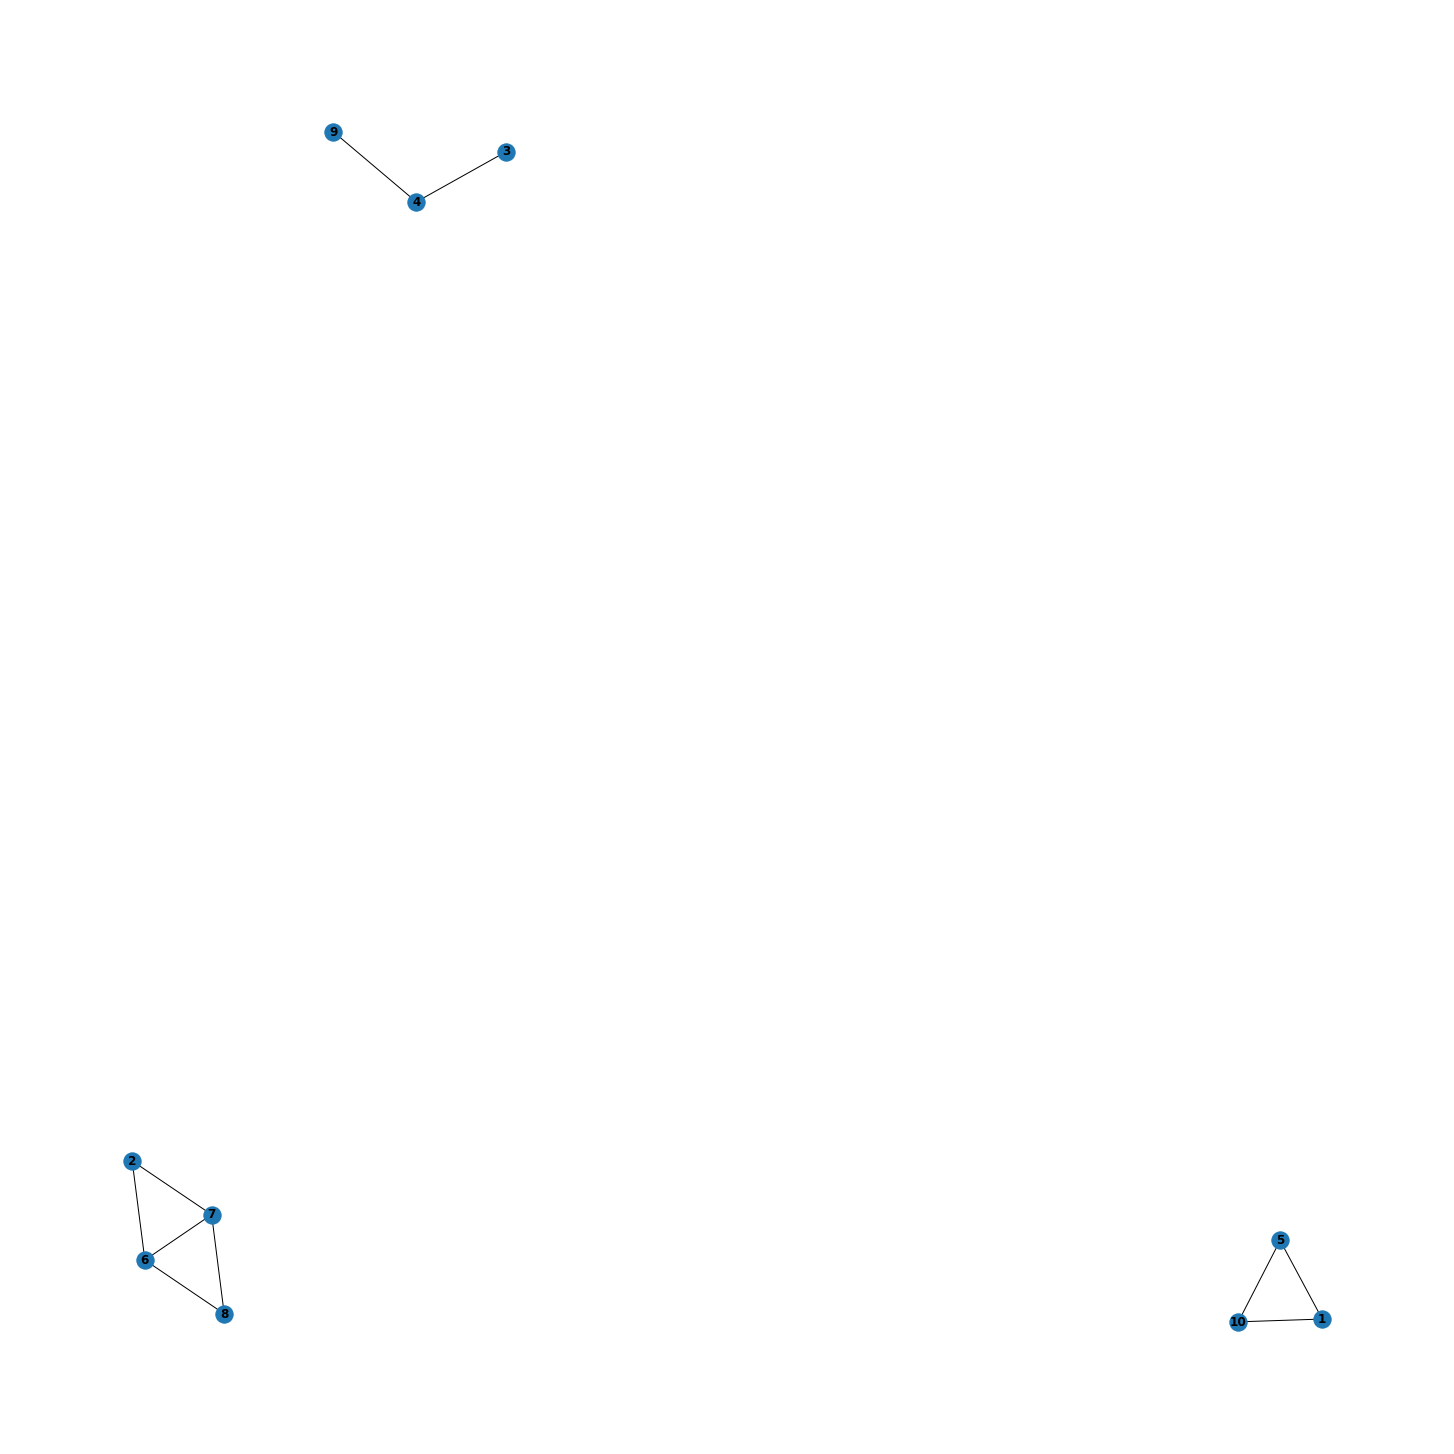

In [245]:
# Set the figure size
plt.figure(figsize=(20, 20))

# Visualize the graph
pos = nx.spring_layout(G)  # Adjust the layout method if needed
nx.draw(G, pos=pos, with_labels=True, font_weight='bold')

plt.show()


[{1, 10, 5}, {8, 2, 6, 7}, {9, 3, 4}]


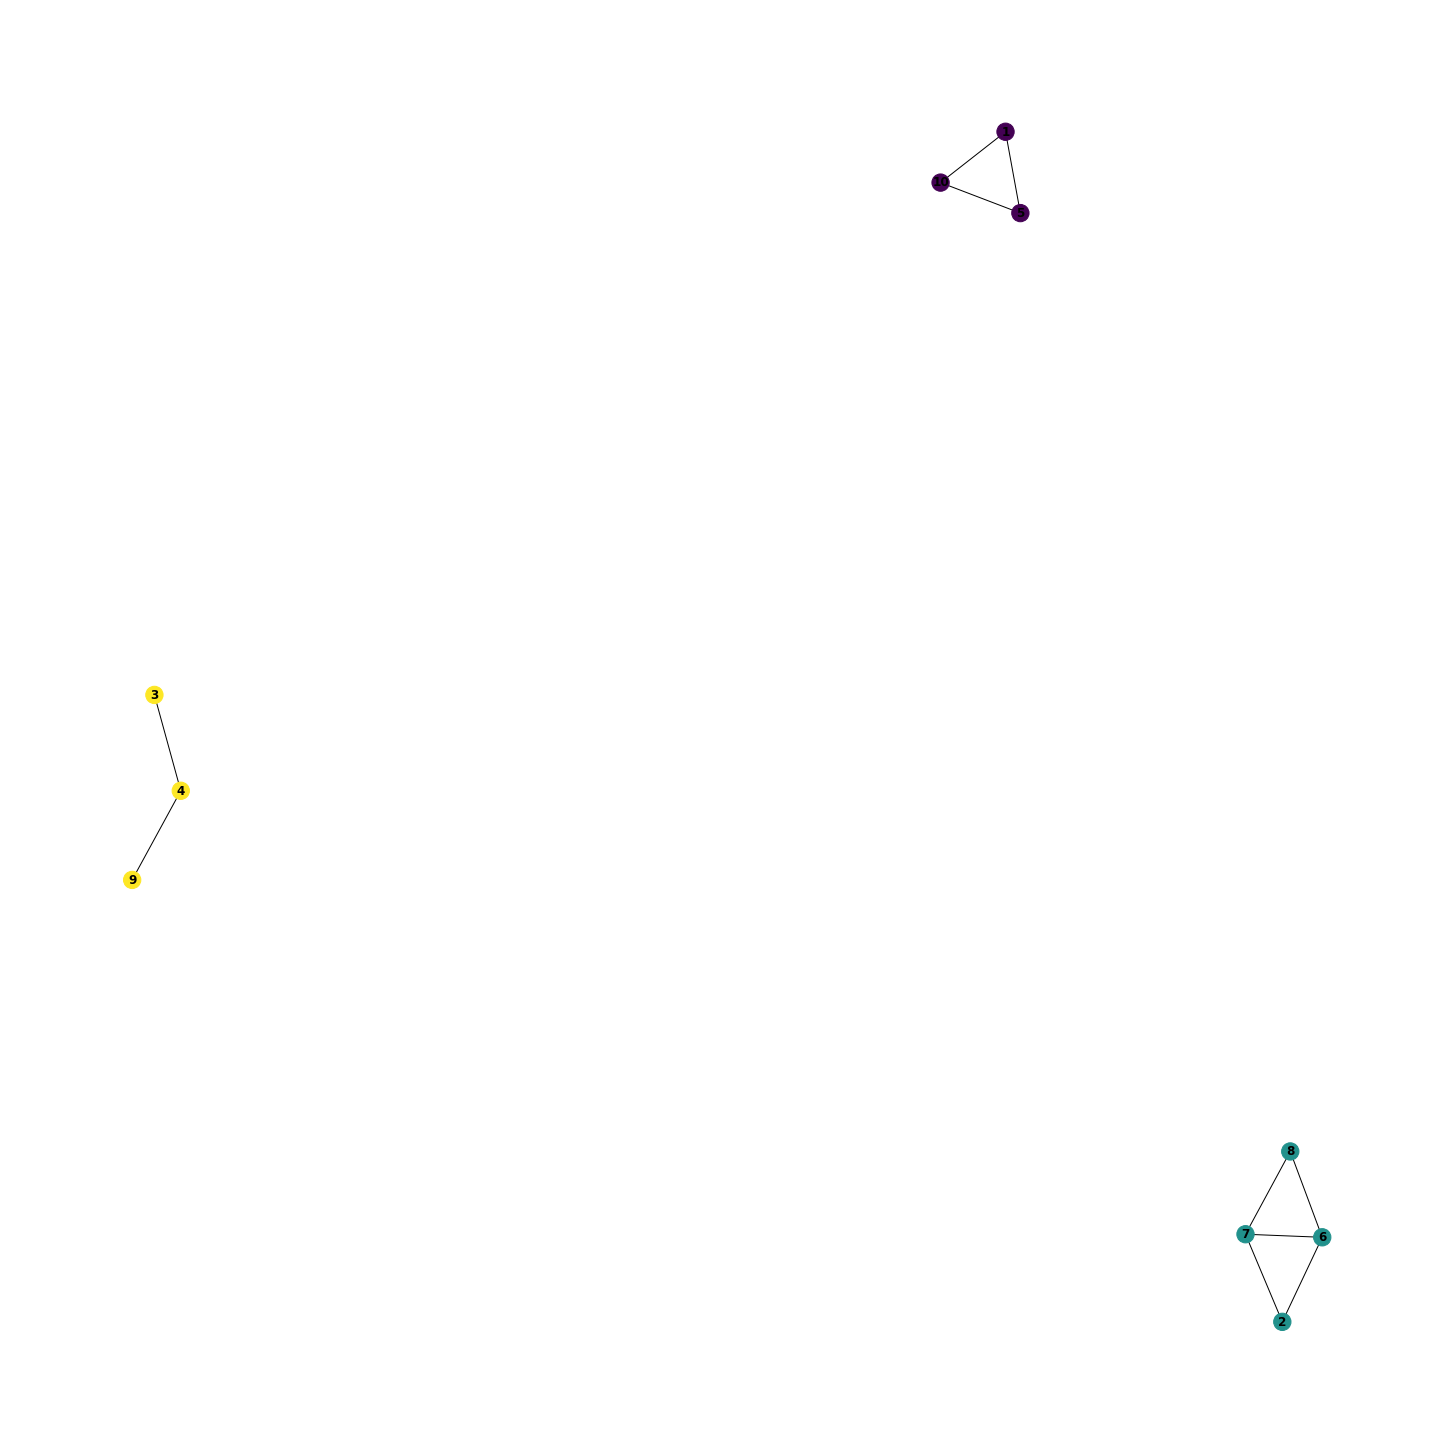

In [246]:
# Detect communities using asynchronous label propagation
communities = list(asyn_lpa_communities(G))
print(communities)
# Assign community labels to nodes
community_labels = {node: idx for idx, nodes in enumerate(communities) for node in nodes}
# Set the figure size
plt.figure(figsize=(20, 20))

# Visualize the graph with community colors
node_colors = [community_labels[node] for node in G.nodes]
nx.draw(G, pos=nx.spring_layout(G), with_labels=True, font_weight='bold', node_color=node_colors, cmap=plt.cm.get_cmap("viridis"))

plt.show()


In [378]:
folder_path = '/Users/abdulnaser/Desktop/Masterarbeit/metadatatransferlearning-main/meta_tl/data/datasets_predicitons/'


In [379]:
algorithums = []
steps = [] 
approachs = []
evals = []
active_learning_candidats_len = []
active_learning_thresholds = []
count_all_rows = []

In [329]:
# All file in the "Prediction" folder should be deleted
del_files("/Users/abdulnaser/Desktop/Masterarbeit/metadatatransferlearning-main/meta_tl/data/First_approach_results/Predictions/music")

columns_to_consider = ['title_dice3','album_dice3','artist_dice3','is_match']

coummunity_count = 1

for community in communities:
    
    print(f"we are now in the {coummunity_count} community")
    print(community)
    overall_accuracy = []
    community_df,belong_to_files = tf_pre_processing(community,similarity_df,mapping)
    
    community_candidate_models = community_df['first_file']
    
    for candidate_model in community_candidate_models:
        print(f"The candidate model that should be processed is {candidate_model}")
        coressponding_to_predict_files = belong_to_files.loc[belong_to_files['first_file']== candidate_model]['belong_to']
        print(f"The number of files to predict is {coressponding_to_predict_files.shape[0]}")
        candidate_model_df = pd.read_csv(path_to_sim_vector_folder + candidate_model)
        candidate_model_df_processed = prepare_dataframe(candidate_model_df)

        X = candidate_model_df_processed.iloc[:, :-1] 
        y = candidate_model_df_processed.iloc[: , -1] 

        model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
        model.fit(X, y)

        # Iterate over the files in the Cluster
        for coressponding_to_predict_file in coressponding_to_predict_files:
             if coressponding_to_predict_file != candidate_model: 
                 # Prepare the data of the file
                 coressponding_to_predict_file_df = pd.read_csv(path_to_sim_vector_folder + coressponding_to_predict_file)
                 coressponding_to_predict_file_df_processed = prepare_dataframe_pred(coressponding_to_predict_file_df)
                 X = coressponding_to_predict_file_df_processed.iloc[:, :-1] # Features (all columns except the last one)
                 y = coressponding_to_predict_file_df_processed.iloc[: , -1] # Taregt variable (is_match)   

                 # Prediction
                 predictions = model.predict(X)
                 class_probs = model.predict_proba(X)
                 coressponding_to_predict_file_df_processed['pred'] = predictions
                 coressponding_to_predict_file_df_processed[['probabilties_0', 'probabilties_1']] = class_probs
                                
                 coressponding_to_predict_file_df_processed.to_csv(f'/Users/abdulnaser/Desktop/Masterarbeit/metadatatransferlearning-main/meta_tl/data/First_approach_results/Predictions/music/{coressponding_to_predict_file}')
        
    coummunity_count = coummunity_count + 1
    

Removed: /Users/abdulnaser/Desktop/Masterarbeit/metadatatransferlearning-main/meta_tl/data/First_approach_results/Predictions/music/4_5.csv
Removed: /Users/abdulnaser/Desktop/Masterarbeit/metadatatransferlearning-main/meta_tl/data/First_approach_results/Predictions/music/2_3.csv
Removed: /Users/abdulnaser/Desktop/Masterarbeit/metadatatransferlearning-main/meta_tl/data/First_approach_results/Predictions/music/2_5.csv
Removed: /Users/abdulnaser/Desktop/Masterarbeit/metadatatransferlearning-main/meta_tl/data/First_approach_results/Predictions/music/2_4.csv
Removed: /Users/abdulnaser/Desktop/Masterarbeit/metadatatransferlearning-main/meta_tl/data/First_approach_results/Predictions/music/1_2.csv
Removed: /Users/abdulnaser/Desktop/Masterarbeit/metadatatransferlearning-main/meta_tl/data/First_approach_results/Predictions/music/3_5.csv
Removed: /Users/abdulnaser/Desktop/Masterarbeit/metadatatransferlearning-main/meta_tl/data/First_approach_results/Predictions/music/3_4.csv
we are now in the 1 

#### 1.7.3 Comapre the results with the supervised results

#### 1.7.4 Iterate over the predictions files generated as a result of the previous result

In [330]:
first_approach_predictions_folder_path = "/Users/abdulnaser/Desktop/Masterarbeit/metadatatransferlearning-main/meta_tl/data/First_approach_results/Predictions/music"

file = []
first_approach_accuracy = []
supervised_accuracy = []
diffs = []


predicted_files = [file for file in os.listdir(first_approach_predictions_folder_path) if file.endswith('.csv')]

for predicted_file in predicted_files:
    file.append(predicted_file)
    predicted_file = pd.read_csv(os.path.join(first_approach_predictions_folder_path,predicted_file))
    predicted_file_df_processed = prepare_dataframe_supervised_approach(predicted_file)
    X = predicted_file_df_processed.iloc[:, :-2] 
    y = predicted_file_df_processed.iloc[: , -2] 

    # Initialize XGBoost classifier
    xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
    
    # Initialize StratifiedKFold
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Lists to store predictions and indices for each fold
    all_predictions = []
    all_indices = []
    temp_first_approach_accuracy = []
    temp_supervised_accuracy = []
    
    # Perform k-fold cross-validation
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Fit the model
        xgb_model.fit(X_train, y_train)

        # Make predictions
        predictions = xgb_model.predict(X_test)

        # Store predictions and indices for this fold
        all_predictions.append(predictions)
        all_indices.append(test_index)
     
    for fold_indices in all_indices:
        predicted_file_df_fold = predicted_file_df_processed.iloc[fold_indices][['is_match','pred']]
        temp_first_approach_accuracy.append(f1_score(predicted_file_df_fold['is_match'], predicted_file_df_fold['pred']))
    
    first_approach_accuracy.append(np.mean(temp_first_approach_accuracy))
   
    
    
    # Calculate F1-score for each fold 
    f1_scores = [f1_score(y.iloc[test_index], pred) for test_index, pred in zip(all_indices, all_predictions)]
    for fold, f1 in enumerate(f1_scores, start=1):
        temp_supervised_accuracy.append(f1)
       
    supervised_accuracy.append(np.mean(temp_supervised_accuracy))
    

    # Calculate average difference
    avg_diff = average_difference(temp_first_approach_accuracy, temp_supervised_accuracy)
    diffs.append(avg_diff)


# Create DataFrame
first_approach_vs_superived_df = pd.DataFrame({
    'file': file,
    'first_approach_accuracy': first_approach_accuracy,
    'supervised_accuracy': supervised_accuracy,
    'avg_diff': diffs
})

#first_approach_vs_superived_df = first_approach_vs_superived_df.loc[(first_approach_vs_superived_df['first_approach_accuracy']!=0) & (first_approach_vs_superived_df['supervised_accuracy']!=0)]



In [331]:
first_approach_vs_superived_df.head(10)

,file,first_approach_accuracy,supervised_accuracy,avg_diff
0,4_5.csv,0.870993,0.996627,0.125634
1,2_3.csv,0.993548,0.993103,0.000445
2,2_5.csv,0.990126,0.995933,0.005814
3,2_4.csv,0.975163,0.992909,0.017746
4,1_2.csv,0.990290,0.995019,0.005334
5,3_5.csv,0.972294,0.971429,0.018182
6,3_4.csv,0.966867,0.986141,0.019274


In [332]:
first_approach_vs_superived_df['first_approach_accuracy'].median()

0.9751631497683994

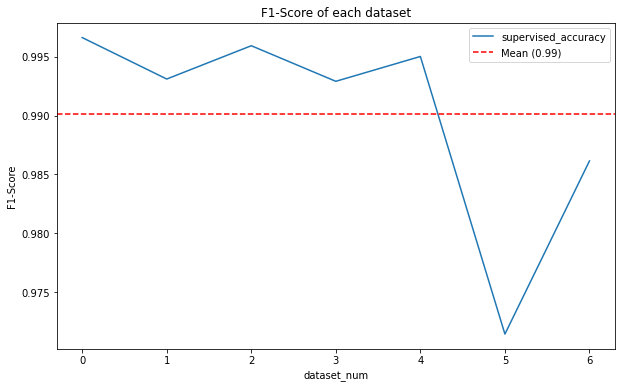

In [309]:
# Plot the line plot
ax = first_approach_vs_superived_df['supervised_accuracy'].plot(kind='line', figsize=(10, 6), title='F1-Score of each dataset', xlabel='dataset_num', ylabel='F1-Score')

mean_value = first_approach_vs_superived_df['supervised_accuracy'].mean()

# Plot the mean line
ax.axhline(y=mean_value, color='r', linestyle='--', label=f'Mean ({mean_value:.2f})')
plt.legend()

plt.show()

In [348]:
# Initialize dictionaries to store columns and corresponding lists
column_statistic_lists = {
    'title_dic3': [],
    'album_dice3': [],
    'artist_dice3': []
}

first_file = []
second_file = []
similiar = []

# Get a list of all CSV files in the folder 
csv_files = [file for file in os.listdir(path_to_sim_vector_folder) if file.endswith('.csv')]
for csv_file_1 in csv_files:
    print(f"first file is {csv_file_1}")
    file_path_1 = os.path.join(path_to_sim_vector_folder, csv_file_1)
    df_1 = prepare_dataframe_to_similarity_comparison(file_path_1)
    for csv_file_2 in csv_files:
        print(f"second file is {csv_file_2}")
        file_path_2 = os.path.join(path_to_sim_vector_folder, csv_file_2)
        if file_path_1 != file_path_2:
            first_file.append(csv_file_1)
            second_file.append(csv_file_2)
            df_2 = prepare_dataframe_to_similarity_comparison(file_path_2)

            df_1_columns = df_1.columns.tolist()
            df_2_columns = df_2.columns.tolist()

            if df_1_columns == df_2_columns:
                p_values = []  # Initialize p_values here

                # Get the intersection of column names
                intersection_columns = df_1.columns.intersection(df_2.columns)
                print(f"intersected columns are {intersection_columns}")

                # Create new DataFrames with only the intersecting columns
                df_1_intersected = df_1[intersection_columns]
                df_2_intersected = df_2[intersection_columns]



first file is 4_5.csv
second file is 4_5.csv
second file is 2_3.csv
intersected columns are Index(['title_dice3', 'album_dice3', 'artist_dice3'], dtype='object')
second file is 2_5.csv
intersected columns are Index(['title_dice3', 'album_dice3', 'artist_dice3'], dtype='object')
second file is 2_4.csv
intersected columns are Index(['title_dice3', 'album_dice3', 'artist_dice3'], dtype='object')
second file is 1_2.csv
intersected columns are Index(['title_dice3', 'album_dice3', 'artist_dice3'], dtype='object')
second file is 1_3.csv
intersected columns are Index(['title_dice3', 'album_dice3', 'artist_dice3'], dtype='object')
second file is 3_5.csv
intersected columns are Index(['title_dice3', 'album_dice3', 'artist_dice3'], dtype='object')
second file is 3_4.csv
intersected columns are Index(['title_dice3', 'album_dice3', 'artist_dice3'], dtype='object')
second file is 1_4.csv
intersected columns are Index(['title_dice3', 'album_dice3', 'artist_dice3'], dtype='object')
second file is 1_5.

intersected columns are Index(['title_dice3', 'album_dice3', 'artist_dice3'], dtype='object')
second file is 2_3.csv
intersected columns are Index(['title_dice3', 'album_dice3', 'artist_dice3'], dtype='object')
second file is 2_5.csv
intersected columns are Index(['title_dice3', 'album_dice3', 'artist_dice3'], dtype='object')
second file is 2_4.csv
intersected columns are Index(['title_dice3', 'album_dice3', 'artist_dice3'], dtype='object')
second file is 1_2.csv
intersected columns are Index(['title_dice3', 'album_dice3', 'artist_dice3'], dtype='object')
second file is 1_3.csv
intersected columns are Index(['title_dice3', 'album_dice3', 'artist_dice3'], dtype='object')
second file is 3_5.csv
intersected columns are Index(['title_dice3', 'album_dice3', 'artist_dice3'], dtype='object')
second file is 3_4.csv
intersected columns are Index(['title_dice3', 'album_dice3', 'artist_dice3'], dtype='object')
second file is 1_4.csv
intersected columns are Index(['title_dice3', 'album_dice3', 'ar

In [377]:
# 1_3.csv 	3_5.csv

csv_files = [file for file in os.listdir(path_to_sim_vector_folder) if file.endswith('.csv')]

candidate_model_df = pd.read_csv(path_to_sim_vector_folder + '1_2.csv')
candidate_model_df_processed = prepare_dataframe(candidate_model_df)

X = candidate_model_df_processed.iloc[:, :-1] 
y = candidate_model_df_processed.iloc[: , -1] 

model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
model.fit(X, y)

# Iterate over the files in the Cluster
for coressponding_to_predict_file in csv_files:
     if coressponding_to_predict_file != '1_2.csv': 
         # Prepare the data of the file
         coressponding_to_predict_file_df = pd.read_csv(path_to_sim_vector_folder + coressponding_to_predict_file)
         coressponding_to_predict_file_df_processed = prepare_dataframe_pred(coressponding_to_predict_file_df)
         X = coressponding_to_predict_file_df_processed.iloc[:, :-1] # Features (all columns except the last one)
         y = coressponding_to_predict_file_df_processed.iloc[: , -1] # Taregt variable (is_match)   

         # Prediction
         predictions = model.predict(X)
         class_probs = model.predict_proba(X)
         coressponding_to_predict_file_df_processed['pred'] = predictions
         coressponding_to_predict_file_df_processed[['probabilties_0', 'probabilties_1']] = class_probs
         print(coressponding_to_predict_file)
         print(f1_score(y, predictions))
         

4_5.csv
0.642590286425903
2_3.csv
0.3804878048780488
2_5.csv
0.9817017383348582
2_4.csv
0.6706827309236948
1_3.csv
0.30422535211267604
3_5.csv
0.49523809523809526
3_4.csv
0.20064724919093851
1_4.csv
0.6352247605011053
1_5.csv
0.9799247176913425


In [363]:
first_file = []
second_file = []
P_Val = []
similiar = []

# Get a list of all CSV files in the folder 
csv_files = [file for file in os.listdir(path_to_sim_vector_folder) if file.endswith('.csv')]
for csv_file_1 in csv_files:
    print(csv_file_1)
    file_path_1 = os.path.join(path_to_sim_vector_folder, csv_file_1)
    df_1 = prepare_dataframe_to_similarity_comparison(file_path_1)
    df_1.fillna(-1, inplace=True)
    for csv_file_2 in csv_files:
        file_path_2 = os.path.join(path_to_sim_vector_folder, csv_file_2)
        if file_path_1 != file_path_2:
            df_2 = prepare_dataframe_to_similarity_comparison(file_path_2)
            df_2.fillna(-1, inplace=True)
            df_1_columns = df_1.columns.tolist()
            df_2_columns = df_2.columns.tolist()                
           
            if df_1_columns == df_2_columns:
                   
                # Get the intersection of column names
                intersection_columns = df_1.columns.intersection(df_2.columns)
                

                # Create new DataFrames with only the intersecting columns
                df_1_intersected = df_1[intersection_columns]
                df_2_intersected = df_2[intersection_columns]
               
                first_file.append(csv_file_1)
                second_file.append(csv_file_2)
                
                X = df_1_intersected.values
                Y = df_2_intersected.values
        
                # Compute p-value using MMD permutation test
                p_value = mmd_permutation_test(X, Y, num_permutations=100, kernel='squared_exp')


                if p_value < 0.05:
                    similiar.append(0)
                    P_Val.append(p_value)
                else:
                    similiar.append(1)
                    P_Val.append(p_value)
                
            
                
            else:
                     
                    first_file.append(csv_file_1)
                    second_file.append(csv_file_2)
                    P_Val.append(-1)
                    similiar.append(0)
            

# Create the final DataFrame
similarity_df_general = pd.DataFrame({
    'first_file': first_file,
    'second_file': second_file,
    'similiar': similiar,
    'P_value': P_Val
})



similarity_mmd_df = similarity_df_general.loc[similarity_df_general['similiar']==1]

similarity_mmd_df.head()



4_5.csv
2_3.csv
2_5.csv
2_4.csv
1_2.csv
1_3.csv
3_5.csv
3_4.csv
1_4.csv
1_5.csv


,first_file,second_file,similiar,P_value
13,2_3.csv,1_3.csv,1,0.069307
34,2_4.csv,1_4.csv,1,0.306931
44,1_2.csv,1_5.csv,1,0.297030
75,1_4.csv,2_4.csv,1,0.207921
85,1_5.csv,1_2.csv,1,0.386139


In [366]:
# Create an empty undirected graph
G = nx.Graph()

# Add nodes from the 'first_file' and 'second_file' columns
G.add_nodes_from(similarity_mmd_df['first_file'].unique())

# Add edges from the 'first_file' and 'second_file' columns with weights
edges = similarity_mmd_df[['first_file', 'second_file']].values.tolist()
G.add_edges_from(edges)

# Relabel nodes to consecutive numbers starting from 1
mapping = {node: i + 1 for i, node in enumerate(G.nodes)}
G = nx.relabel_nodes(G, mapping)

# Relabel edges using the same mapping
#edge_labels = {(mapping[edge[0]], mapping[edge[1]]): edge[2] for edge in edges}



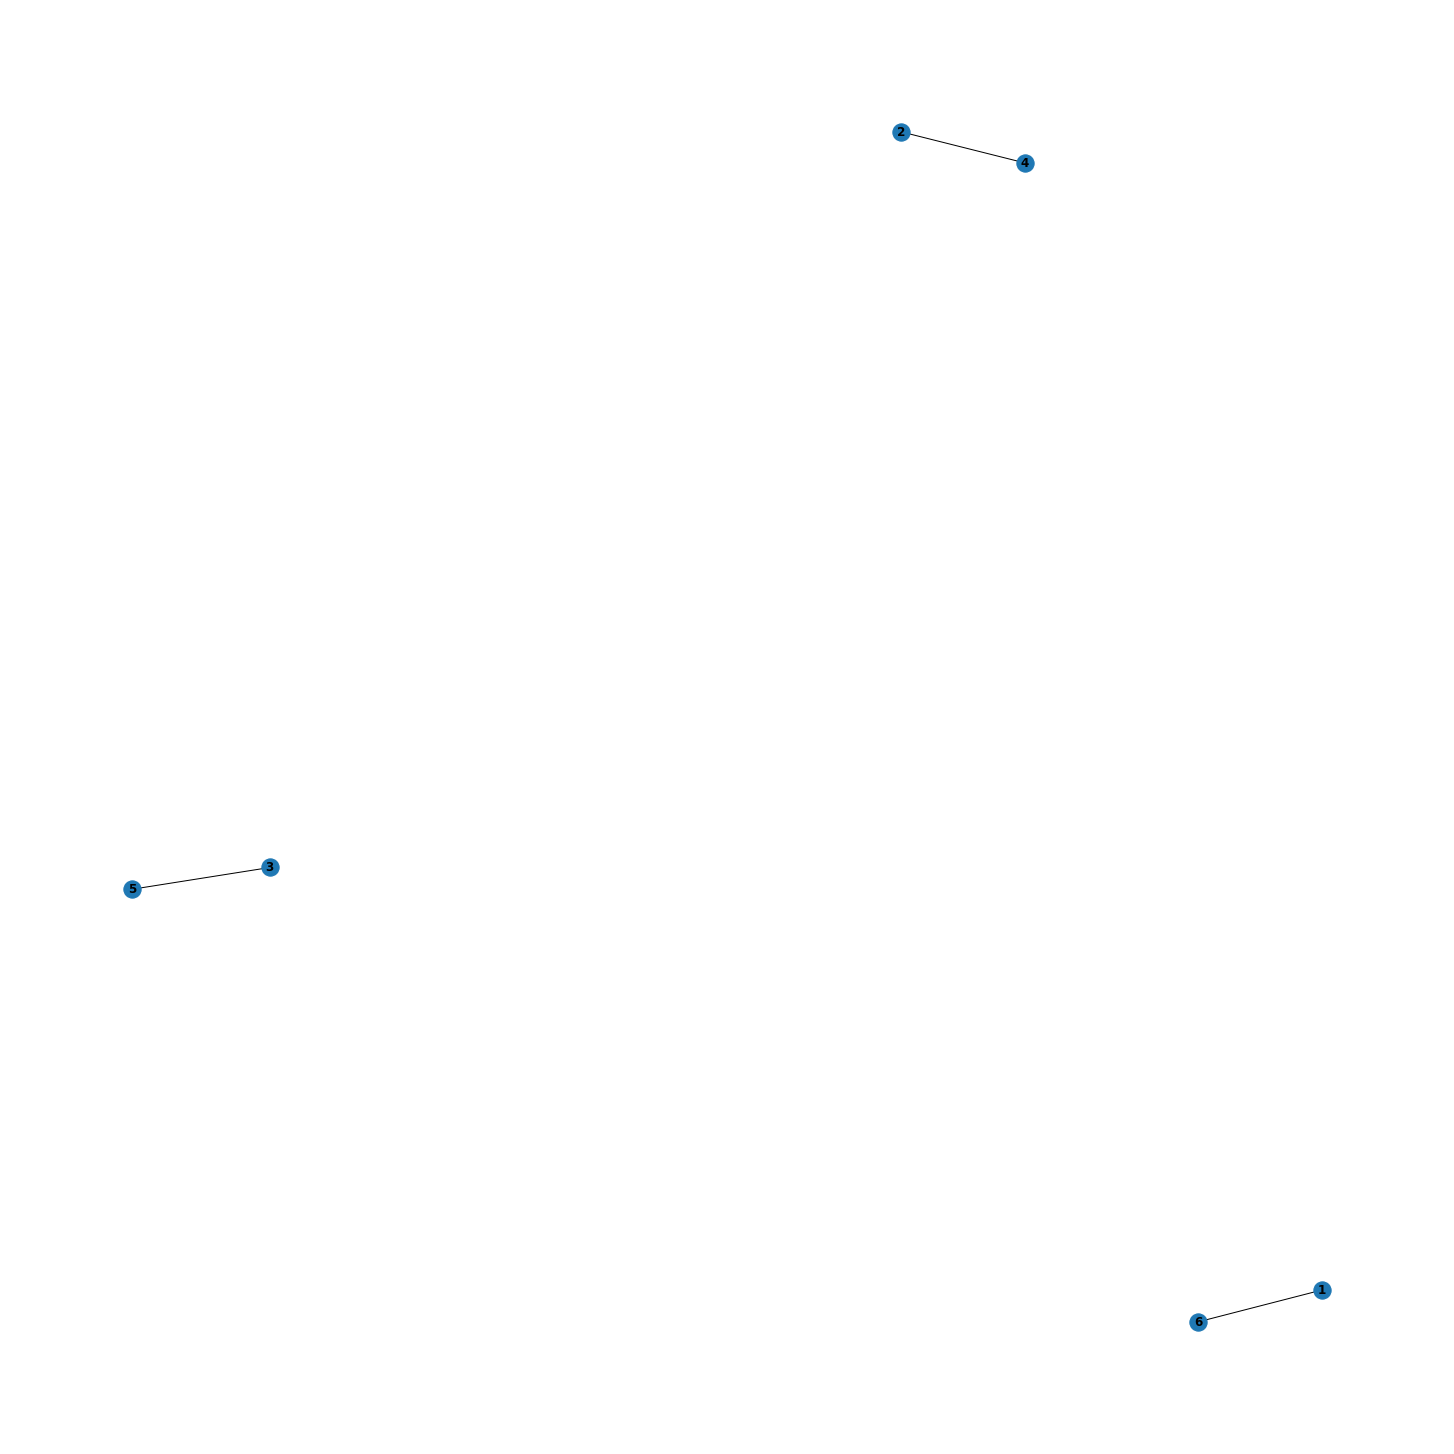

In [367]:
# Set the figure size
plt.figure(figsize=(20, 20))

# Visualize the graph
pos = nx.spring_layout(G)  # Adjust the layout method if needed
nx.draw(G, pos=pos, with_labels=True, font_weight='bold')

plt.show()


In [380]:
# All file in the "Prediction" folder should be deleted
del_files("/Users/abdulnaser/Desktop/Masterarbeit/metadatatransferlearning-main/meta_tl/data/First_approach_results/Predictions/music")

columns_to_consider = ['title_dice3','album_dice3','artist_dice3','is_match']

coummunity_count = 1

for community in communities:
    
    print(f"we are now in the {coummunity_count} community")
    print(community)
    overall_accuracy = []
    community_df,belong_to_files = tf_pre_processing(community,similarity_df,mapping)
    
    community_candidate_models = community_df['first_file']
    
    for candidate_model in community_candidate_models:
        print(f"The candidate model that should be processed is {candidate_model}")
        coressponding_to_predict_files = belong_to_files.loc[belong_to_files['first_file']== candidate_model]['belong_to']
        print(f"The number of files to predict is {coressponding_to_predict_files.shape[0]}")
        candidate_model_df = pd.read_csv(path_to_sim_vector_folder + candidate_model)
        candidate_model_df_processed = prepare_dataframe(candidate_model_df)

        X = candidate_model_df_processed.iloc[:, :-1] 
        y = candidate_model_df_processed.iloc[: , -1] 

        model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
        model.fit(X, y)

        # Iterate over the files in the Cluster
        for coressponding_to_predict_file in coressponding_to_predict_files:
             if coressponding_to_predict_file != candidate_model: 
                 # Prepare the data of the file
                 coressponding_to_predict_file_df = pd.read_csv(path_to_sim_vector_folder + coressponding_to_predict_file)
                 coressponding_to_predict_file_df_processed = prepare_dataframe_pred(coressponding_to_predict_file_df)
                 X = coressponding_to_predict_file_df_processed.iloc[:, :-1] # Features (all columns except the last one)
                 y = coressponding_to_predict_file_df_processed.iloc[: , -1] # Taregt variable (is_match)   

                 # Prediction
                 predictions = model.predict(X)
                 class_probs = model.predict_proba(X)
                 coressponding_to_predict_file_df_processed['pred'] = predictions
                 coressponding_to_predict_file_df_processed[['probabilties_0', 'probabilties_1']] = class_probs
                                
                 coressponding_to_predict_file_df_processed.to_csv(f'/Users/abdulnaser/Desktop/Masterarbeit/metadatatransferlearning-main/meta_tl/data/First_approach_results/Predictions/music/{coressponding_to_predict_file}')
        
    coummunity_count = coummunity_count + 1
    

Removed: /Users/abdulnaser/Desktop/Masterarbeit/metadatatransferlearning-main/meta_tl/data/First_approach_results/Predictions/music/4_5.csv
Removed: /Users/abdulnaser/Desktop/Masterarbeit/metadatatransferlearning-main/meta_tl/data/First_approach_results/Predictions/music/2_3.csv
Removed: /Users/abdulnaser/Desktop/Masterarbeit/metadatatransferlearning-main/meta_tl/data/First_approach_results/Predictions/music/2_5.csv
Removed: /Users/abdulnaser/Desktop/Masterarbeit/metadatatransferlearning-main/meta_tl/data/First_approach_results/Predictions/music/2_4.csv
Removed: /Users/abdulnaser/Desktop/Masterarbeit/metadatatransferlearning-main/meta_tl/data/First_approach_results/Predictions/music/1_2.csv
Removed: /Users/abdulnaser/Desktop/Masterarbeit/metadatatransferlearning-main/meta_tl/data/First_approach_results/Predictions/music/3_5.csv
Removed: /Users/abdulnaser/Desktop/Masterarbeit/metadatatransferlearning-main/meta_tl/data/First_approach_results/Predictions/music/3_4.csv
we are now in the 1 

ValueError: You are trying to merge on float64 and object columns. If you wish to proceed you should use pd.concat